## Complex_Problem- Color Prediction Keras -NN
> We are going to make predictions on two colors from our two files.

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import numpy as np
from tensorflow import keras
import pandas as pd

In [2]:
train_data = pd.read_csv('data/train.csv')
test_data = pd.read_csv('data/test.csv')
np.random.shuffle(train_data.values)
np.random.shuffle(test_data.values)

In [3]:
train_data.head()

,x,y,color
0,4.929019,-2.357534,1.0
1,-0.719524,-1.960296,0.0
2,-4.713231,4.923385,1.0
3,4.360371,1.218258,0.0
4,0.619257,-2.730743,1.0


### Visualisation

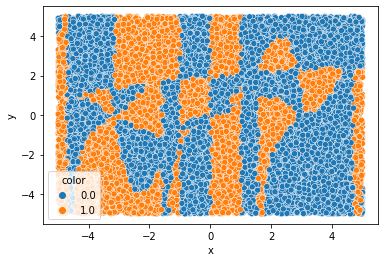

In [6]:
sns.scatterplot(data=train_data, x='x', y='y', hue='color')
plt.show()

In [4]:
X_train = train_data[:].values[:, :2]
y_train = train_data[:].values[:, -1].reshape((-1, 1)).astype(np.float32)
X_test = test_data[:].values[:, :2]
y_test = test_data[:].values[:, -1]

In [15]:
model = keras.Sequential([
    keras.layers.Dense(64, input_shape=(2, ), activation='relu'),
    keras.layers.Dropout(.2),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dropout(.2),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(2, activation='softmax')
])
model.compile(optimizer="adam",
             metrics =['accuracy'],
             loss = keras.losses.SparseCategoricalCrossentropy(from_logits=True)
             )
model.fit(X_train, y_train, epochs=10, batch_size=5)
print("Evaluation")
model.evaluate(X_test, y_test)

Epoch 1/10
4000/4000 [==============================] - 6s 1ms/step - loss: 0.6309 - accuracy: 0.6184
Epoch 2/10
4000/4000 [==============================] - 6s 1ms/step - loss: 0.5780 - accuracy: 0.7108
Epoch 3/10
4000/4000 [==============================] - 5s 1ms/step - loss: 0.5259 - accuracy: 0.7473
Epoch 4/10
4000/4000 [==============================] - 5s 1ms/step - loss: 0.5023 - accuracy: 0.7564
Epoch 5/10
4000/4000 [==============================] - 5s 1ms/step - loss: 0.4778 - accuracy: 0.7731
Epoch 6/10
4000/4000 [==============================] - 5s 1ms/step - loss: 0.4693 - accuracy: 0.7768
Epoch 7/10
4000/4000 [==============================] - 5s 1ms/step - loss: 0.4577 - accuracy: 0.7830
Epoch 8/10
4000/4000 [==============================] - 5s 1ms/step - loss: 0.4446 - accuracy: 0.7941
Epoch 9/10
4000/4000 [==============================] - 5s 1ms/step - loss: 0.4342 - accuracy: 0.8006
Epoch 10/10
4000/4000 [==============================] - 5s 1ms/step - loss: 0.424

[0.3735722601413727, 0.8303999900817871]

In [18]:
np.argmax(model.predict([[0.1, -2]]))

1

> The model quite correct.